## MULTIPLE LINEAR REGRESSION

### HOUSING CASE STUDY

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### READING AND UNDERSTANDING DATASET

In [4]:
inpo = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Abhi/Housing.csv")

In [5]:
inpo.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
inpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
inpo.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
num_cols = ['price','area', 'bedrooms', 'bathrooms', 'stories','parking']

## Data Preparation

In [21]:
inpo['mainroad'] = inpo['mainroad'].map({'yes':1,'no':0})
inpo['guestroom'] = inpo['guestroom'].map({'yes':1,'no':0})
inpo['basement'] = inpo['basement'].map({'yes':1,'no':0})
inpo['hotwaterheating'] = inpo['hotwaterheating'].map({'yes':1,'no':0})
inpo['prefarea'] = inpo['prefarea'].map({'yes':1,'no':0})
inpo['airconditioning'] = inpo['airconditioning'].map({'yes':1,'no':0})

In [22]:
inpo

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [23]:
status = pd.get_dummies(inpo['furnishingstatus'],drop_first = True)

In [24]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [25]:
inpo = pd.concat([inpo,status],axis = 1)
inpo

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [26]:
inpo.drop(['furnishingstatus'],axis = 1,inplace = True)

In [27]:
inpo

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'price')

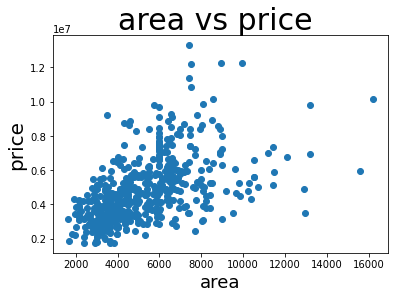

In [28]:
fig1 = plt.figure()
plt.scatter(inpo['area'],inpo['price'])
fig1.suptitle('area vs price' , fontsize = 30)
plt.xlabel('area' , fontsize = 18)
plt.ylabel('price' , fontsize = 20)

In [66]:
## saving the dataframe as a csv file
inpo.to_csv('Housing_Clean.csv')

## Data Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_train,df_test = train_test_split(inpo,test_size=0.2,random_state=78)

In [31]:
len(df_train)

436

In [32]:
len(df_test)

109

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
Scaler = StandardScaler()

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# scale only numeric columns in train
df_train[num_cols] = Scaler.fit_transform(df_train[num_cols])

In [38]:
#df_train

In [39]:
df_test[num_cols] = Scaler.transform(df_test[num_cols])

In [40]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
135,0.520633,0.399785,0.033814,1.455544,2.571636,1,0,0,0,1,-0.770031,0,0,1
255,-0.151516,0.347215,-1.306444,-0.559114,-0.906854,1,0,0,0,1,0.403863,0,0,1
336,-0.442174,1.350621,0.033814,-0.559114,-0.906854,1,0,0,0,1,1.577756,0,1,0
359,-0.551172,-0.697334,0.033814,-0.559114,-0.906854,1,0,0,0,0,0.403863,0,0,1
490,-1.005326,-0.354485,0.033814,-0.559114,0.252643,0,0,0,1,0,0.403863,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,-0.857998,-1.246808,0.033814,-0.559114,-0.906854,1,0,0,0,0,-0.770031,1,1,0
220,0.011980,1.359764,1.374071,-0.559114,2.571636,1,0,1,0,1,1.577756,0,1,0
247,-0.115183,1.496904,1.374071,-0.559114,2.571636,1,0,0,0,0,2.751650,0,0,1
6,2.791405,1.579188,1.374071,3.470201,2.571636,1,0,0,0,1,1.577756,1,1,0


In [41]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [42]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [43]:
x_test

array([[ 0.3997848 ,  0.03381384,  1.45554384, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.34721451, -1.30644367, -0.55911367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.35062138,  0.03381384, -0.55911367, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.49690393,  1.37407134, -0.55911367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.57918787,  1.37407134,  3.47020135, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.92777338,  0.03381384,  1.45554384, ...,  0.        ,
         0.        ,  1.        ]])

In [44]:
y_test

array([ 5.20632843e-01, -1.51515654e-01, -4.42174464e-01, -5.51171517e-01,
       -1.00532591e+00,  3.20804911e-01, -2.42346532e-01, -2.96845059e-01,
       -2.55301432e-03,  1.39260927e+00,  6.64784529e-02,  5.71498135e-01,
       -5.14839166e-01, -7.32833273e-01,  2.29974033e-01, -4.25186006e-02,
       -9.70171274e-02, -7.69165624e-01, -1.51515654e-01, -4.05842113e-01,
       -1.09615679e+00, -1.55148889e-01,  1.10195046e+00, -1.69681830e-01,
        1.88309601e+00, -9.70171274e-02, -1.20515384e+00, -1.87848005e-01,
        6.80495188e-01, -2.96845059e-01,  8.54890474e-01,  1.02810804e-01,
        6.64784529e-02,  6.28452178e-02, -4.05842113e-01, -1.15183303e-01,
        2.06475777e+00, -3.15011235e-01, -8.41830327e-01, -9.50827380e-01,
       -5.51171517e-01, -8.41830327e-01,  2.11925630e+00,  4.57051228e-01,
        1.51977250e+00, -2.96845059e-01, -5.87503869e-01, -5.14839166e-01,
       -8.41830327e-01, -3.96759025e-01,  9.02122530e-01,  7.89492242e-01,
       -1.38681559e+00,  

### Building The Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()

In [47]:
model

LinearRegression()

In [48]:
model.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = model.predict(x_test)

In [50]:
y_pred

array([ 0.95920467, -0.2531179 ,  0.48858144, -0.96843488, -0.28836833,
        1.14367482,  0.52247213,  0.12941746, -0.11137105,  0.09065067,
       -0.70936588,  0.62329518, -0.95344919, -1.11681397,  0.7030801 ,
       -0.29629963, -0.43582188, -0.27312871, -0.29301408,  0.46668208,
       -0.80095446, -0.10510694,  0.27080964, -0.6125441 ,  1.4994714 ,
       -0.05687369, -1.05857353, -0.74375077,  0.07570145, -0.18770814,
        0.49518346,  1.05413001, -0.42877662,  0.8561756 , -0.61026668,
       -0.54974875,  0.44411185, -0.23456507,  0.44039945, -0.64174118,
       -0.49384604, -0.52130727,  1.25056633,  1.20197573,  1.36296943,
        0.62131057,  0.73823006, -0.11086482, -1.03918768, -0.04113472,
        1.20304822,  1.14980763, -1.04519579,  0.71607521, -0.61974796,
       -0.29456162,  0.60630172,  0.9375489 , -0.6241982 ,  0.15723761,
       -0.74167249,  0.14449168,  1.77421198, -0.86420175,  0.21541746,
        1.22858382,  0.82974567, -0.18620766, -1.08511747, -0.34

### Evaluating Model

In [51]:
from sklearn.metrics import r2_score

In [52]:
score = r2_score(y_test,y_pred)
score

0.49030214670785977

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_test,y_pred)

0.3586616877804931

In [55]:
m = (y_test - y_pred)
m

array([-0.43857183,  0.10160225, -0.9307559 ,  0.41726336, -0.71695758,
       -0.82286991, -0.76481866, -0.42626252,  0.10881803,  1.3019586 ,
        0.77584433, -0.05179705,  0.43861003,  0.3839807 , -0.47310607,
        0.25378103,  0.33880475, -0.49603692,  0.14149843, -0.87252419,
       -0.29520233, -0.05004195,  0.83114083,  0.44286227,  0.38362461,
       -0.04014344, -0.14658031,  0.55590276,  0.60479374, -0.10913692,
        0.35970701, -0.95131921,  0.49525507, -0.79333038,  0.20442456,
        0.43456545,  1.62064592, -0.08044616, -1.28222978, -0.3090862 ,
       -0.05732547, -0.32052306,  0.86868997, -0.7449245 ,  0.15680307,
       -0.91815563, -1.32573392, -0.40397434,  0.19735736, -0.35562431,
       -0.30092569, -0.36031539, -0.3416198 , -0.21360854,  0.50456466,
        0.21571066, -0.36906121, -0.58041164, -0.36296153, -1.28972674,
       -0.79047251, -0.80466025, -0.72676004, -0.05029328,  0.75936977,
       -0.43545835, -1.48991424, -0.0379727 ,  0.24328715, -0.56

### Checking Linear Assumption

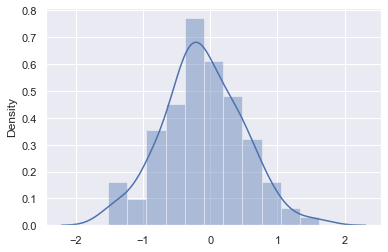

In [56]:
import seaborn as sns 
import numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
y = sns.distplot(m)

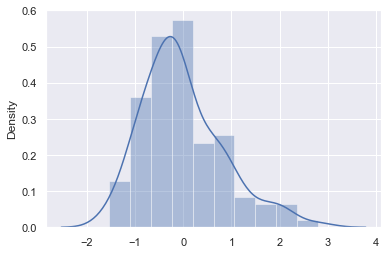

In [57]:
import seaborn as sns 
import numpy as np
sns.set_theme(); np.random.seed(0)
x = np.random.randn(100)
y = sns.distplot(y_test)

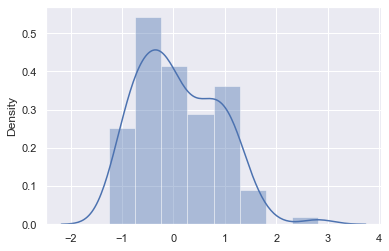

In [58]:
a = sns.distplot(y_pred)

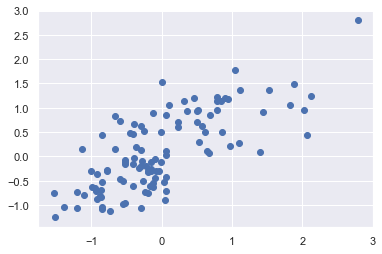

In [59]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()

Text(0, 0.5, 'y_test')

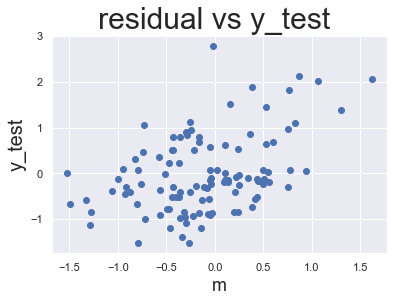

In [60]:
fig = plt.figure()
plt.scatter(m,y_test)
fig.suptitle('residual vs y_test' , fontsize = 30)
plt.xlabel('m' , fontsize = 18)
plt.ylabel('y_test' , fontsize = 20)

## Save Model

In [61]:
import pickle

In [62]:
## save the model to disk
# .sav is for saving model    .pickle is for saving data
filename = 'Final_HousePrice.sav'
pickle.dump(model, open(filename, 'wb'))   ##"wb"=write binary model

In [63]:
##lokk the model from disk
loaded_model = pickle.load(open(filename, 'rb'))    ##"rd"=read binary model